## Perceptron Algorithm


#### **Overview**

The perceptron is one of the earliest and simplest **linear classification algorithms**, designed to separate data that is linearly separable. It learns a weight vector through an iterative update rule based on classification errors.

This notebook demonstrates the application of a custom perceptron classifier to a binary classification dataset. The example emphasizes the relationship between **linear decision boundaries, convergence behavior, and data separability.**

The goals of this notebook are to:
 - Understand the perceptron learning rule
 - Visualize linear decision boundaries
 - Apply a perceptron implemented from scratch
 - Analyze convergence and classification performance

In [1]:
import sys
import os
from pathlib import Path

# 1. Add the project root's 'src' directory to the Python path
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, os.pardir))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added project source directory to sys.path: {src_path}")

Added project source directory to sys.path: /Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src


In [2]:
# First, load in the appropriate python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.metrics import ( accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report)
from sklearn.decomposition import PCA

# NOTE: Since Path is used in the next cell, it needs to be imported here
from pathlib import Path 

# add the functions we coded in the src file
from rice_ml.processing.preprocessing import load_and_prepare_data
from rice_ml.supervised_learning.perceptron import (train_perceptron,
                                                    evaluate_model,
                                                    plot_confusion_matrix,
                                                    plot_decision_boundary)

In [3]:
# Then, make sure data is loaded
# set path to find dataset
repo_root = Path("/Users/doriolson/Desktop/repos/CMOR_438_Final_Repository")
data_path = Path("../../../Data/adult.csv")

# load data
df = load_and_prepare_data(data_path)

/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/processing/preprocessing.py:606: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


The largest part of the machine learning is actually training the algorithm, which is done in the function below (the code of which is in perceptron.py in the src folder). This trains a perceptron model using the adult income dataset, and adjusts the weights of the various variables depending on how accurately the set threshold can predict an observation's binary income marker. 

In [4]:
model, X_test, y_test = train_perceptron(df)

Once the model has been trained, we can evaluate how well the algorithm was able to predict adult income. The evaluation tests the accuracy, precision, and recall of the perceptron. Here, we see that accuracy gets to 0.81 and Precision gets to 0.75.

In [5]:
evaluate_model(model, X_test, y_test)

Accuracy: 0.8104207185996519
Precision: 0.7494866529774127
Recall: 0.31223267750213857
F1 Score: 0.44082125603864736

Confusion Matrix:
[[7187  244]
 [1608  730]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7431
           1       0.75      0.31      0.44      2338

    accuracy                           0.81      9769
   macro avg       0.78      0.64      0.66      9769
weighted avg       0.80      0.81      0.78      9769



## Visualizations
There are a number of visualizations that can be produced for a perceptron model. 

The first graph is a Principal Component Analysis (PCA). A PCA can help simplify the findings of a model by limiting the outside "noise" on the variable of interest and creating clusters to see how the binary outcomes can be predicted. In this case, there is a small cluster of lower income cases that can be seen as separate and can be used as an identifying indicator, however the bulk of the data is clumped together closely. While one side of the clump appears higher income and the other lower income, this indicates that it is difficult to determine factors that clearly indicate income status. 

/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value enc

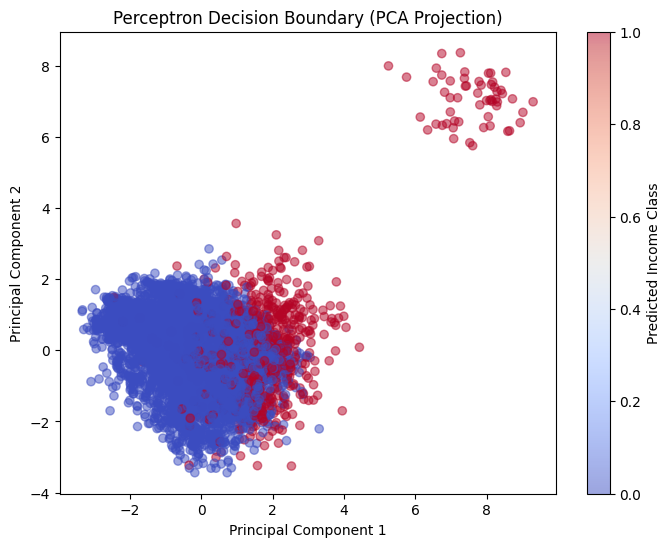

In [6]:
plot_decision_boundary(model, X_test, y_test)

The second plot we can generate is a Confusion Heat Map. This shows the accuracy of the model's predictions by comparing what the model predicted of the binary income variable versus the actual values. The map shows that our model pretty accurately predicted when people were in the lower income category, although admittedly the majority of observations fit into that category. Nevertheless, this is a helpful visual to see the accuracy of the model.

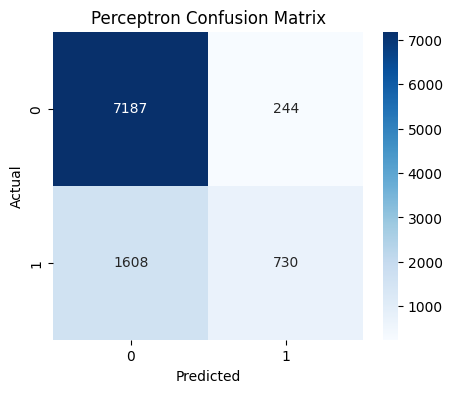

In [7]:
plot_confusion_matrix(model, X_test, y_test)